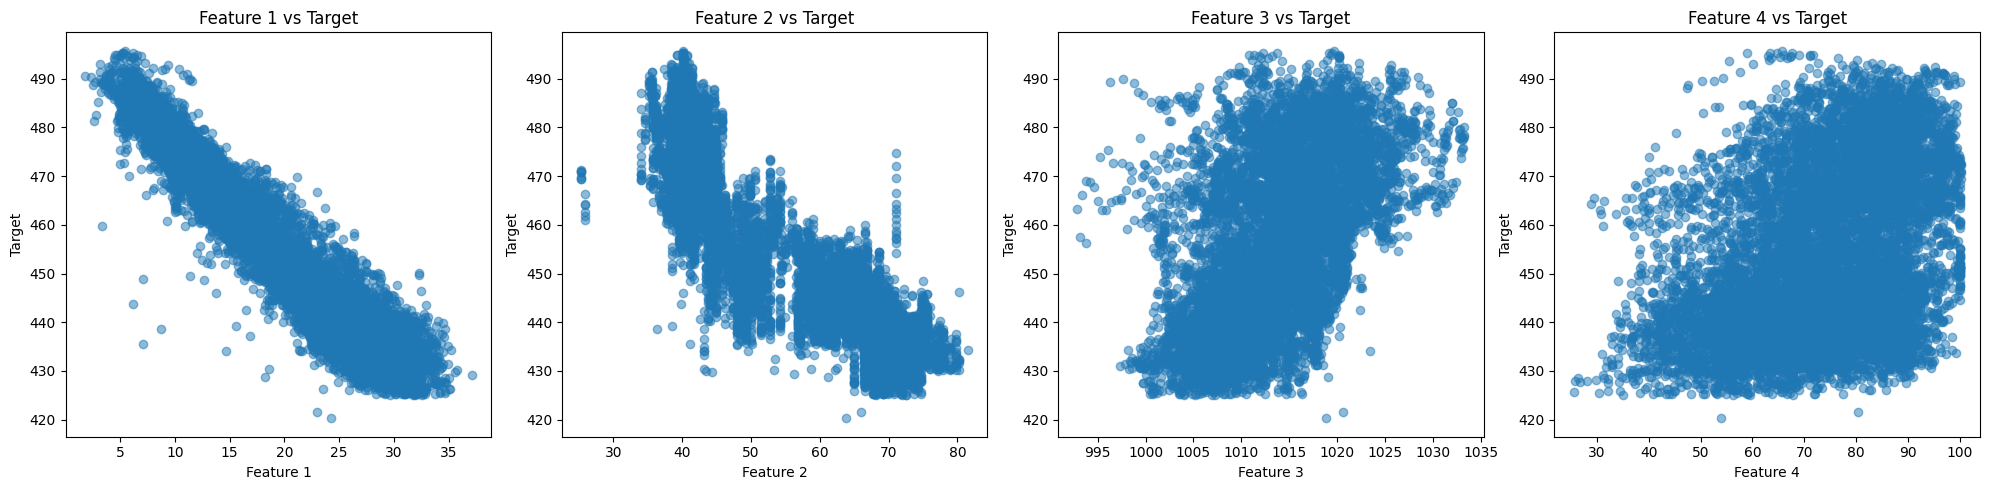

Training on original data...


<ipython-input-11-e04ed0165947>:38: RuntimeWarning: overflow encountered in square
  cost = (1/(2*m)) * np.sum((y_pred - y_true)**2)
<ipython-input-11-e04ed0165947>:67: RuntimeWarning: invalid value encountered in subtract
  weights -= learning_rate * dw


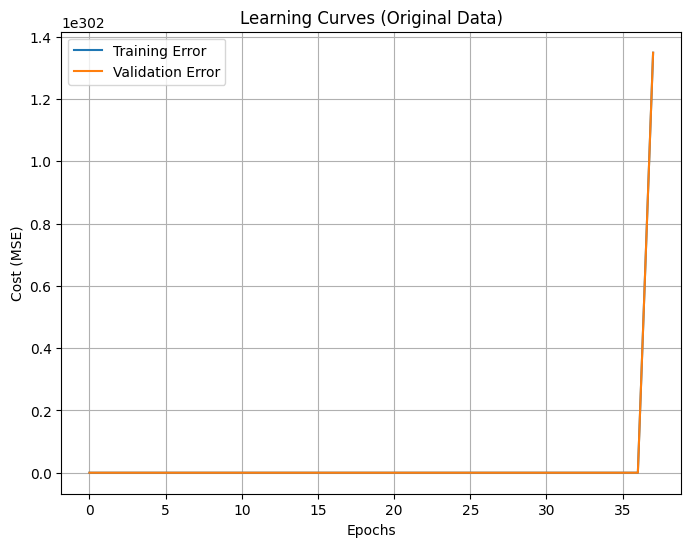

Training Error (MSE): nan
Validation Error (MSE): nan
Learned Weights: [nan nan nan nan]
Learned Bias: nan

Training on scaled data...


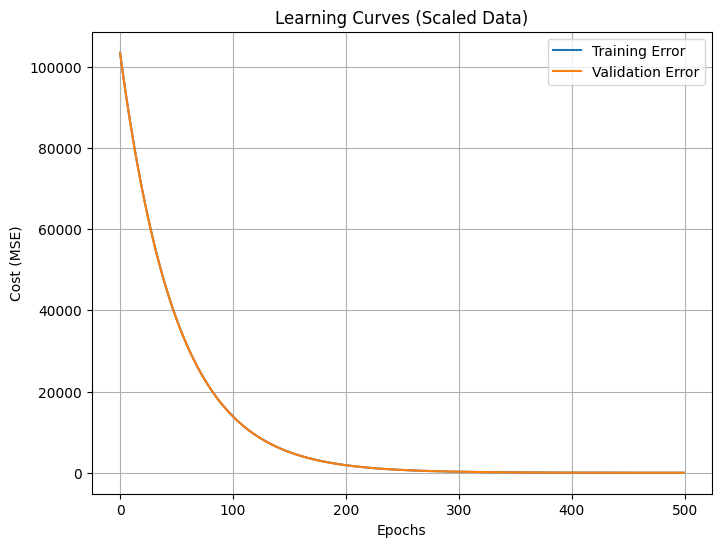

Training Error (MSE): 33.6898
Validation Error (MSE): 32.3467
Learned Weights: [-10.0211367   -6.2353704    1.4246729   -0.61120872]
Learned Bias: 451.44520853696605


In [11]:
# linear_regression_gradient_descent.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def load_data(filepath):
    data = pd.read_excel(filepath)
    # data = pd.read_csv(filepath)
    X = data.iloc[:, :-1].values  # all columns except last
    y = data.iloc[:, -1].values   # last column
    return X, y

def plot_features_vs_target(X, y, feature_names=None):
    plt.figure(figsize=(20, 5))
    num_features = X.shape[1]
    for i in range(num_features):
        plt.subplot(1, num_features, i+1)
        plt.scatter(X[:, i], y, alpha=0.5)
        plt.xlabel(f"Feature {i+1}" if feature_names is None else feature_names[i])
        plt.ylabel("Target")
        plt.title(f"Feature {i+1} vs Target")
    plt.tight_layout()
    plt.show()

def initialize_parameters(n_features):
    weights = np.zeros(n_features)
    bias = 0
    return weights, bias

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_cost(y_true, y_pred):
    m = len(y_true)
    cost = (1/(2*m)) * np.sum((y_pred - y_true)**2)
    return cost

def compute_gradients(X, y_true, y_pred):
    m = len(y_true)
    dw = (1/m) * np.dot(X.T, (y_pred - y_true))
    db = (1/m) * np.sum(y_pred - y_true)
    return dw, db

def gradient_descent(X_train, y_train, X_val, y_val, learning_rate=0.01, n_epochs=500):
    n_features = X_train.shape[1]
    weights, bias = initialize_parameters(n_features)

    train_errors = []
    val_errors = []

    for epoch in range(n_epochs):
        y_train_pred = predict(X_train, weights, bias)
        y_val_pred = predict(X_val, weights, bias)

        train_cost = compute_cost(y_train, y_train_pred)
        val_cost = compute_cost(y_val, y_val_pred)

        train_errors.append(train_cost)
        val_errors.append(val_cost)

        dw, db = compute_gradients(X_train, y_train, y_train_pred)

        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias, train_errors, val_errors


def cross_validation(X, y, k_folds=5, learning_rate=0.01, n_epochs=500):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    fold_train_errors = []
    fold_val_errors = []
    fold_weights = []
    fold_biases = []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        weights, bias, _, _ = gradient_descent(X_train, y_train, X_val, y_val, learning_rate, n_epochs)

        train_error, val_error = report_results(weights, bias, X_train, y_train, X_val, y_val)

        fold_train_errors.append(train_error)
        fold_val_errors.append(val_error)
        fold_weights.append(weights)
        fold_biases.append(bias)

        print(f"Fold {fold+1}: Train Error={train_error:.4f}, Validation Error={val_error:.4f}")
        print("-"*50)

    avg_train_error = np.mean(fold_train_errors)
    avg_val_error = np.mean(fold_val_errors)

    # Pick the model with lowest validation error
    best_fold_idx = np.argmin(fold_val_errors)
    best_weights = fold_weights[best_fold_idx]
    best_bias = fold_biases[best_fold_idx]

    print("\nCross-validation results:")
    print(f"Average Training Error: {avg_train_error:.4f}")
    print(f"Average Validation Error: {avg_val_error:.4f}")
    print(f"Best Validation Error: {fold_val_errors[best_fold_idx]:.4f}")

    return best_weights, best_bias

def plot_learning_curves(train_errors, val_errors, title):
    plt.figure(figsize=(8, 6))
    plt.plot(train_errors, label="Training Error")
    plt.plot(val_errors, label="Validation Error")
    plt.xlabel("Epochs")
    plt.ylabel("Cost (MSE)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

def report_results(weights, bias, X_train, y_train, X_val, y_val):
    y_train_pred = predict(X_train, weights, bias)
    y_val_pred = predict(X_val, weights, bias)

    train_error = compute_cost(y_train, y_train_pred) * 2  # undo 1/2m factor for normal MSE
    val_error = compute_cost(y_val, y_val_pred) * 2

    print(f"Training Error (MSE): {train_error:.4f}")
    print(f"Validation Error (MSE): {val_error:.4f}")
    print(f"Learned Weights: {weights}")
    print(f"Learned Bias: {bias}")

def main():
    filepath = 'Folds5x2_pp.xlsx'  # Make sure the file is available
    # filepath = 'data_02b.csv'
    X, y = load_data(filepath)

    # Plot features against target
    plot_features_vs_target(X, y)

    # Split data
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    print("Training on original data...")
    weights_orig, bias_orig, train_errors_orig, val_errors_orig = gradient_descent(X_train, y_train, X_val, y_val)
    plot_learning_curves(train_errors_orig, val_errors_orig, "Learning Curves (Original Data)")
    report_results(weights_orig, bias_orig, X_train, y_train, X_val, y_val)

    # Normalize data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    print("\nTraining on scaled data...")
    weights_scaled, bias_scaled, train_errors_scaled, val_errors_scaled = gradient_descent(X_train_scaled, y_train, X_val_scaled, y_val)
    plot_learning_curves(train_errors_scaled, val_errors_scaled, "Learning Curves (Scaled Data)")
    report_results(weights_scaled, bias_scaled, X_train_scaled, y_train, X_val_scaled, y_val)

if __name__ == "__main__":
    main()
